In [2]:

###simulating in pybamm#############
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import importlib  
from pyarrow import parquet
import pybamm
import pybop
from pathlib import Path
# Import custom modules
# sys.path.append(r'C:\PythonEnv')
from extract_model import get_model_data
# from extended_fitting_problem import ExtendedFittingProblem
from ep_bolfi.utility.preprocessing import SubstitutionDict
from pybamm import ParameterValues
from pathlib import Path
li_metal_literature = ParameterValues("Ecker2015_graphite_halfcell")
from ep_bolfi.utility.preprocessing import SubstitutionDict

[json adapter] num_row_groups = 138


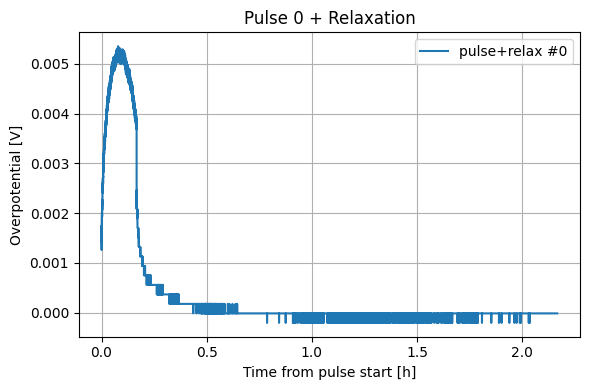

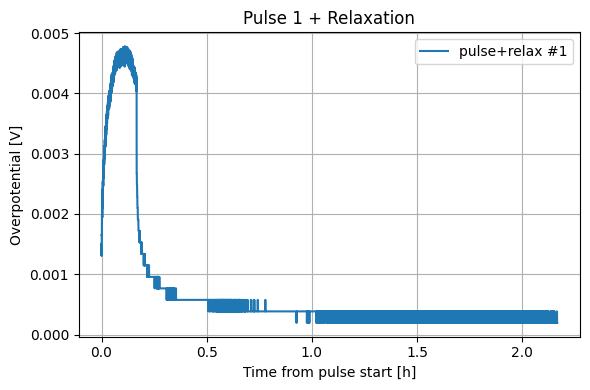

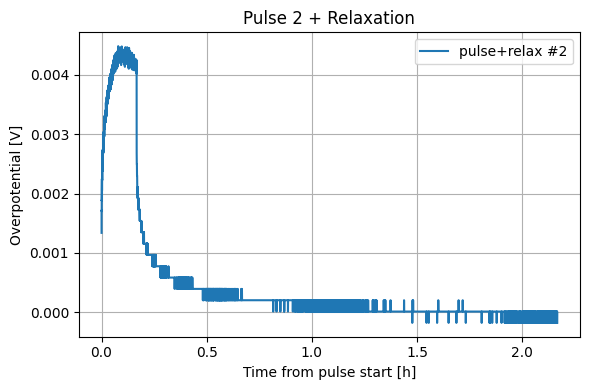

[run] pulse 0
[IC] pulse 0: theta=0.9495, c_max=37534.2, c_init=35638.6


 c:\Users\mugi_jo\New_Pybop\new_pybop\Lib\site-packages\pybop\models\lithium_ion\base_echem.py:78: UserWarning:The default solver changed to IDAKLUSolver after the v25.4.0. release. You can swap back to the previous default by using `pybamm.CasadiSolver()` instead.
 c:\Users\mugi_jo\New_Pybop\new_pybop\Lib\site-packages\pybop\optimisers\base_pints_optimiser.py:98: UserWarning:Unrecognised keyword arguments: {'max_iterations': 500, 'seed': 0} will not be used.


In [ ]:
from data_custom_cell_neg_electrode.ocv_function import OCV_Curve_Fit
###simulating in pybamm#############
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import importlib  
from pyarrow import parquet
import pybamm
import pybop
from pathlib import Path
# Import custom modules
# sys.path.append(r'C:\PythonEnv')
from extract_model import get_model_data
# from extended_fitting_problem import ExtendedFittingProblem
from ep_bolfi.utility.preprocessing import SubstitutionDict
from pybamm import ParameterValues
from pathlib import Path
li_metal_literature = ParameterValues("Ecker2015_graphite_halfcell")


def electrode_length(par):
    return par["Current collector perpendicular area [m2]"]**0.5


def init_electrode_concentration(par):
    return 0.8 * max_electrode_concentration(par)


def max_electrode_concentration(par):
    return (
        par["Nominal cell capacity [A.h]"] * 3600
        / 96485.33212
        / (
            par["Positive electrode thickness [m]"]
            * par["Current collector perpendicular area [m2]"]
            * par["Positive electrode porosity"]
        )
    )


def specific_surface_area(par):
    return (
        3
        * (1 - par["Positive electrode porosity"])
        / par["Positive particle radius [m]"]
    )


# def OCV_Curve_Fit(SOC):
#     return (
#           (SOC < 0.006015075376884422) * ((
#               3796.83317416261 * SOC
#             + -62.73480757488008) * SOC
#             + 0.8895692693129978)
#         + (SOC >= 0.006015075376884422) * (SOC < 0.011030150753768845) * ((
#               690.0582306864599 * SOC
#             + -25.35983664683033) * SOC
#             + 0.7771626356424561)
#         + (SOC >= 0.011030150753768845) * (SOC < 0.02106030150753769) * ((
#               167.22440456834192 * SOC
#             + -13.825964804325125) * SOC
#             + 0.7135524630437156)
#         + (SOC >= 0.02106030150753769) * (SOC < 0.03610552763819096) * ((
#               7.732562793529723 * SOC
#             + -7.108072252785057) * SOC
#             + 0.6428120417283776)
#         + (SOC >= 0.03610552763819096) * (SOC < 0.0461356783919598) * ((
#               -29.52026500215561 * SOC
#             + -4.418006245629272) * SOC
#             + 0.5942489154434178)
#         + (SOC >= 0.0461356783919598) * (SOC < 0.05115075376884422) * ((
#               175.38168188917552 * SOC
#             + -23.324586892959132) * SOC
#             + 1.0303828775618458)
#         + (SOC >= 0.05115075376884422) * (SOC < 0.061180904522613065) * ((
#               120.30834478797806 * SOC
#             + -17.690501482375282) * SOC
#             + 0.8862890197871396)
#         + (SOC >= 0.061180904522613065) * (SOC < 0.06619597989949749) * ((
#               62.43772225903513 * SOC
#             + -10.609347419160315) * SOC
#             + 0.669673314461404)
#         + (SOC >= 0.06619597989949749) * (SOC < 0.07622613065326633) * ((
#               39.71951139583257 * SOC
#             + -7.601638959854114) * SOC
#             + 0.5701242101035175)
#         + (SOC >= 0.07622613065326633) * (SOC < 0.08124120603015075) * ((
#               99.08819759472317 * SOC
#             + -16.652529421673023) * SOC
#             + 0.915081389539024)
#         + (SOC >= 0.08124120603015075) * (SOC < 0.09628643216080401) * ((
#               12.653399803860452 * SOC
#             + -2.6083949906691757) * SOC
#             + 0.344600180126863)
#         + (SOC >= 0.09628643216080401) * (SOC < 0.12637688442211056) * ((
#               -0.18079163077010207 * SOC
#             + -0.13687798485051772) * SOC
#             + 0.22561340286934772)
#         + (SOC >= 0.12637688442211056) * (SOC < 0.14643718592964824) * ((
#               -20.63152799276571 * SOC
#             + 5.032122706283445) * SOC
#             + -0.10100769859127556)
#         + (SOC >= 0.14643718592964824) * (SOC < 0.1614824120603015) * ((
#               5.5942575652046855 * SOC
#             + -2.6487377655237907) * SOC
#             + 0.46137409791358497)
#         + (SOC >= 0.1614824120603015) * (SOC < 0.19157286432160803) * ((
#               2.4908350011221074 * SOC
#             + -1.6464414429429297) * SOC
#             + 0.3804474840288208)
#         + (SOC >= 0.19157286432160803) * (SOC < 0.20661809045226132) * ((
#               -1.7551771802641838 * SOC
#             + -0.01960001187769933) * SOC
#             + 0.2246181476557041)
#         + (SOC >= 0.20661809045226132) * (SOC < 0.22166331658291458) * ((
#               9.482908887799738 * SOC
#             + -4.6635837793207315) * SOC
#             + 0.7043836767159011)
#         + (SOC >= 0.22166331658291458) * (SOC < 0.23670854271356784) * ((
#               9.666235984758828 * SOC
#             + -4.7448575639837) * SOC
#             + 0.7133913850457159)
#         + (SOC >= 0.23670854271356784) * (SOC < 0.2517537688442211) * ((
#               3.559857544760767 * SOC
#             + -1.853993680404713) * SOC
#             + 0.37124529651308125)
#         + (SOC >= 0.2517537688442211) * (SOC < 0.37713065326633166) * ((
#               0.1405942024173763 * SOC
#             + -0.13236881419305035) * SOC
#             + 0.15453252221072356)
#         + (SOC >= 0.37713065326633166) * (SOC < 0.44232663316582915) * ((
#               -0.19749372401334497 * SOC
#             + 0.12263782691950809) * SOC
#             + 0.10644711163570753)
#         + (SOC >= 0.44232663316582915) * (SOC < 0.4724170854271357) * ((
#               -0.5563780009265145 * SOC
#             + 0.4401259747258166) * SOC
#             + 0.036230379891094344)
#         + (SOC >= 0.4724170854271357) * (SOC < 0.48746231155778896) * ((
#               -2.3410418719803374 * SOC
#             + 2.1263373835865593) * SOC
#             + -0.36206715970288883)
#         + (SOC >= 0.48746231155778896) * (SOC < 0.5025075376884423) * ((
#               -12.111447874125247 * SOC
#             + 11.651746772913782) * SOC
#             + -2.683706199430773)
#         + (SOC >= 0.5025075376884423) * (SOC < 0.512537688442211) * ((
#               -28.75277657418451 * SOC
#             + 28.376532990775445) * SOC
#             + -6.885871769782398)
#         + (SOC >= 0.512537688442211) * (SOC < 0.5225678391959799) * ((
#               32.02681788459779 * SOC
#             + -33.927132705943166) * SOC
#             + 9.080616629053821)
#         + (SOC >= 0.5225678391959799) * (SOC < 0.5376130653266331) * ((
#               12.45312774317648 * SOC
#             + -13.469970781354789) * SOC
#             + 3.7354891775466257)
#         + (SOC >= 0.5376130653266331) * (SOC < 0.5677035175879397) * ((
#               0.6695615379886348 * SOC
#             + -0.799972485254095) * SOC
#             + 0.3297108667216655)
#         + (SOC >= 0.5677035175879397) * (SOC < 0.6278844221105527) * ((
#               0.1693613393040243 * SOC
#             + -0.2320416606712179) * SOC
#             + 0.16850270329051353)
#         + (SOC >= 0.6278844221105527) * (SOC < 0.7532613065326633) * ((
#               0.019732088293821004 * SOC
#             + -0.04414190906846871) * SOC
#             + 0.10951303981560945)
#         + (SOC >= 0.7532613065326633) * (SOC < 0.8786381909547738) * ((
#               -0.03485357179855786 * SOC
#             + 0.03809262220979903) * SOC
#             + 0.07854099457922548)
#         + (SOC >= 0.8786381909547738) * (SOC < 0.9087286432160804) * ((
#               -0.33588186354069904 * SOC
#             + 0.5670825295748472) * SOC
#             + -0.15385437304104954)
#         + (SOC >= 0.9087286432160804) * (SOC < 0.938819095477387) * ((
#               -0.4365655116458811 * SOC
#             + 0.7500707594481781) * SOC
#             + -0.23699769596969844)
#         + (SOC >= 0.938819095477387) * (SOC < 0.9538643216080401) * ((
#               -9.933948732168204 * SOC
#             + 18.58272020843401) * SOC
#             + -8.607813608800711)
#         + (SOC >= 0.9538643216080401) * (SOC < 0.9689095477386934) * ((
#               -72.93596313959816 * SOC
#             + 138.77346767380027) * SOC
#             + -65.93064650610825)
#         + (SOC >= 0.9689095477386934) * (SOC < 0.9739246231155779) * ((
#               9.26995702809063 * SOC
#             + -20.526734188435967) * SOC
#             + 11.243096764402935)
#         + (SOC >= 0.9739246231155779) * (SOC < 0.9789396984924623) * ((
#               435.1364714128962 * SOC
#             + -850.0505032279702) * SOC
#             + 415.1899088280236)
#         + (SOC >= 0.9789396984924623) * (SOC < 0.9839547738693467) * ((
#               -383.079292268435 * SOC
#             + 751.917282771994) * SOC
#             + -368.9250218826975)
#         + (SOC >= 0.9839547738693467) * (SOC < 0.9889698492462311) * ((
#               151.75008294452346 * SOC
#             + -300.5785511207064) * SOC
#             + 148.8791282354632)
#         + (SOC >= 0.9889698492462311) * (SOC < 0.9939849246231156) * ((
#               -888.3864044908313 * SOC
#             + 1756.7486992281872) * SOC
#             + -868.4381820783909)
#         + (SOC >= 0.9939849246231156) * ((
#               -1149.9297243353903 * SOC
#             + 2276.6889333509334) * SOC
#             + -1126.8445592899031)
#     )


from ep_bolfi.utility.preprocessing import SubstitutionDict
from pybamm import ParameterValues

li_metal_literature = ParameterValues("Ecker2015_graphite_halfcell")

parameters = SubstitutionDict({
    # ---------- Interphase ----------
    "Exchange-current density for lithium metal electrode [A.m-2]":
        li_metal_literature["Exchange-current density for lithium metal electrode [A.m-2]"],

    # ---------- Electrolyte (tuned for stronger conc. polarization & slower relaxation) ----------
    "Cation transference number": 0.18,                  # was 0.25
    "Electrolyte conductivity [S.m-1]": 1.5346,             # was 0.88 (↑ kappa → ↓ iR step)
    "Electrolyte diffusivity [m2.s-1]": 1.223304356847241e-10,         # was 2.5e-10 (↓ De → ↑ build-up, slower tail)
    "Initial concentration in electrolyte [mol.m-3]": 1200.0,
    "Thermodynamic factor": 3.0,                         # was 2.25 (↑ factor → a bit more conc. overpot.)

    # ---------- Counter-electrode: Li-metal ----------
    "Lithium metal partial molar volume [m3.mol-1]":
        li_metal_literature["Lithium metal partial molar volume [m3.mol-1]"],
    "Negative electrode conductivity [S.m-1]": 10.6e6,
    "Negative electrode thickness [m]": 500e-6,

    # ---------- Separator (tortuosity ↑) ----------
    "Separator Bruggeman coefficient": 1.7,              # was 1.0
    "Separator porosity": 0.93,
    "Separator thickness [m]": 260e-6,

    # ---------- Sample electrode: graphite (working electrode) ----------
    "Nominal cell capacity [A.h]": 11.355 / 3600,
    "Positive electrode Bruggeman coefficient": 1.5,
    "Positive electrode conductivity [S.m-1]": 40.0,

    # Kinetics (reduce activation jump)
    "Positive electrode exchange-current density [A.m-2]": 12.0,   # was 3

    # OCP
    "Positive electrode OCP [V]": OCV_Curve_Fit,
    "Positive electrode OCP entropic change [V.K-1]": 0,

    # Morphology / geometry
    "Positive electrode porosity": 0.44,
    "Positive electrode thickness [m]": 28e-6,
    "Positive electrode active material volume fraction": 0.55,

    # Solid diffusion (keep your current choice; revisit after electrolyte fits)
    "Positive electrode diffusivity [m2.s-1]": 4e-16,     # keep for now (you had this); can retune later
    "Positive particle radius [m]": 10 * 4.7e-6,

    # ---------- Cell geometry ----------
    "Current collector perpendicular area [m2]": 2.545e-4,
    "Current function [A]": 0.0,
    "Number of cells connected in series to make a battery": 1,
    "Number of electrodes connected in parallel to make a cell": 1,

    # ---------- Ambient ----------
    "Ambient temperature [K]": 298.15,
    "Initial temperature [K]": 298.15,
    "Reference temperature [K]": 298.15,

    # ---------- Limits ----------
    "Lower voltage cut-off [V]": 0.0,
    "Open-circuit voltage at 0% SOC [V]": 0.0,
    "Open-circuit voltage at 100% SOC [V]": 0.9,
    "Upper voltage cut-off [V]": 0.9,
},
substitutions={
    # proxy-derived
    "Initial concentration in positive electrode [mol.m-3]": init_electrode_concentration,
    "Maximum concentration in positive electrode [mol.m-3]": max_electrode_concentration,

    # linked 1D+1D
    "Positive electrode surface area to volume ratio [m-1]": specific_surface_area,

    # keep consistent Bruggeman mapping
    "Electrode height [m]": electrode_length,
    "Electrode width [m]": electrode_length,
    "Positive electrode Bruggeman coefficient (electrode)": "Positive electrode Bruggeman coefficient",
    "Positive electrode Bruggeman coefficient (electrolyte)": "Positive electrode Bruggeman coefficient",
    "Separator Bruggeman coefficient (electrode)": "Separator Bruggeman coefficient",
    "Separator Bruggeman coefficient (electrolyte)": "Separator Bruggeman coefficient",
})

# ============================ Dataset files ============================
OCV_JSON_PATH = Path(r'C:\Users\mugi_jo\New_Pybop\Pybop\data_custom_cell_neg_electrode\MyOutputFileName_extraction_with_negative_soc.json')

with open(OCV_JSON_PATH, 'r', encoding='utf-8') as f:
    ocv_data = json.load(f)

# ======================= JSON-backed adapter =======================
# OVER_JSON_PATH = Path(r"D:\DLR_Projects\ruphay_data\data_two\delith\overpotentials.json")
OVER_JSON_PATH = Path(r"C:\Users\mugi_jo\New_Pybop\Pybop\data_custom_cell_neg_electrode\overpotentials.json")

##################################################################
class JsonSegmentsAdapter:
    def __init__(self, json_path: Path):
        with open(json_path, "r", encoding="utf-8") as f:
            d = json.load(f)
        self._T = d.get("timepoints [s]") or d.get("timepoints") or []
        self._V = d.get("voltages [V]") or d.get("voltages") or []
        self._I = d.get("currents [A]") or d.get("currents") or []
        n = max(len(self._T), len(self._V), len(self._I))
        self._rows = []
        for k in range(n):
            t = self._as_1d(self._T, k)
            v = self._as_1d(self._V, k)
            i = self._as_1d(self._I, k, like=t, fallback_zero=True)
            m = np.isfinite(t) & np.isfinite(v) & np.isfinite(i)
            t, v, i = t[m], v[m], i[m]
            if t.size:
                order = np.argsort(t, kind="mergesort")
                t, v, i = t[order], v[order], i[order]
            self._rows.append({
                "timepoints [s]": t,
                "voltages [V]": v,
                "currents [A]": i,
            })

    @property
    def num_row_groups(self) -> int:
        return len(self._rows)

    def read_row_group(self, i: int, columns=None):
        row = self._rows[i]
        if columns is None:
            return row
        return {c: row[c] for c in columns}

    @staticmethod
    def _as_1d(lst, k, like=None, fallback_zero=False):
        if k < len(lst):
            val = lst[k]
            arr = np.asarray(val, dtype=float)
            if arr.ndim == 0:
                arr = np.array([arr], dtype=float)
            return arr
        if fallback_zero and like is not None:
            return np.zeros_like(like, dtype=float)
        return np.array([], dtype=float)

Data_pos_el_real_noise = JsonSegmentsAdapter(OVER_JSON_PATH)
print(f"[json adapter] num_row_groups = {Data_pos_el_real_noise.num_row_groups}")

def load_pulse_data(pulse_number: int):
    row_pulse = Data_pos_el_real_noise.read_row_group(2 * pulse_number)
    row_relax = Data_pos_el_real_noise.read_row_group(2 * pulse_number + 1)
    pulse_time = np.array([row_pulse['timepoints [s]']][0])
    pulse_voltage = np.array([row_pulse['voltages [V]']][0])
    pulse_current = np.array([row_pulse['currents [A]']][0])
    relax_time = np.array([row_relax['timepoints [s]']][0])
    relax_voltage = np.array([row_relax['voltages [V]']][0])
    relax_current = np.array([row_relax['currents [A]']][0])

    pulse_time_aligned = pulse_time - pulse_time[0]
    relax_time_aligned = relax_time - pulse_time[0]

    time_data = np.concatenate([pulse_time_aligned, relax_time_aligned])[:]
    voltage_data = np.concatenate([pulse_voltage, relax_voltage])[:]
    current_data = np.concatenate([pulse_current, relax_current])[:]

    sort_idx = np.argsort(time_data)
    time_data = time_data[sort_idx]
    voltage_data = voltage_data[sort_idx]
    current_data = current_data[sort_idx]

    increasing = np.diff(time_data) > 0
    keep = np.concatenate([[True], increasing])
    return time_data[keep], voltage_data[keep], current_data[keep]

def plot_first_n_pairs(n=3):
    n_pairs = Data_pos_el_real_noise.num_row_groups // 2
    n = min(n, n_pairs)
    for p in range(n):
        t, v, _ = load_pulse_data(p)
        plt.figure(figsize=(6, 4))
        plt.plot(t / 3600.0, v, label=f"pulse+relax #{p}")
        plt.xlabel("Time from pulse start [h]")
        plt.ylabel("Overpotential [V]")
        plt.title(f"Pulse {p} + Relaxation")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
def materialize_params(base):
    # Fill linked / derived keys as numbers
    base = dict(base)
    base["Positive electrode surface area to volume ratio [m-1]"] = specific_surface_area(base)
    L = electrode_length(base)
    base["Electrode height [m]"] = L
    base["Electrode width [m]"]  = L
    v = base.get("Positive electrode Bruggeman coefficient", 1.5)
    base["Positive electrode Bruggeman coefficient (electrode)"]   = v
    base["Positive electrode Bruggeman coefficient (electrolyte)"] = v
    v = base.get("Separator Bruggeman coefficient", 1.0)
    base["Separator Bruggeman coefficient (electrode)"]   = v
    base["Separator Bruggeman coefficient (electrolyte)"] = v
    return base

def build_params_for_pulse(template_params, theta_pos, cmax_fixed=None):
    """
    theta_pos: per-pulse SOC of your working electrode (you guarantee it's in [0,1])
    cmax_fixed: optional fixed c_max (else computed from geometry/capacity)
    """
    base = dict(template_params)

    # Half-cell mapping: working electrode OCP on "Positive", Li reference on "Negative"
    base["Positive electrode OCP [V]"] = OCV_Curve_Fit
    base["Negative electrode OCP [V]"] = (lambda soc: 0.0)

    # Choose c_max
    cmax = float(cmax_fixed) if cmax_fixed is not None else \
        max_electrode_concentration(materialize_params(base))
    # Set initial state from SOC
    theta = float(theta_pos)

    base["Maximum concentration in positive electrode [mol.m-3]"] = cmax
    base["Initial concentration in positive electrode [mol.m-3]"] = theta * cmax
    base["Positive electrode SOC"] = theta  # for consistency

    # Prevent substitutions from overwriting these numeric ICs
    if hasattr(template_params, "substitutions"):
        subs = dict(template_params.substitutions)
        subs.pop("Initial concentration in positive electrode [mol.m-3]", None)
        subs.pop("Maximum concentration in positive electrode [mol.m-3]", None)
        base = SubstitutionDict(base, substitutions=subs)

    return materialize_params(base)
    
# ============================ Fitting loop ============================
from pathlib import Path
RESULTS_DIR = r"C:\Users\mugi_jo\New_Pybop\Pybop\data_custom_cell_neg_electrode\reults2"
# save_dir=None
def process_pulse(pulse_number, template_parameters, cmax_fixed=None,
                  save_dir=RESULTS_DIR, show=True):
    theta_pos = float(ocv_data["Negative electrode SOC [-]"][pulse_number])
    per_pulse_params = build_params_for_pulse(template_parameters, theta_pos)
    # Optional: log what will be used
    print(f"[IC] pulse {pulse_number}: theta={theta_pos:.4f}, "
          f"c_max={per_pulse_params['Maximum concentration in positive electrode [mol.m-3]']:.1f}, "
          f"c_init={per_pulse_params['Initial concentration in positive electrode [mol.m-3]']:.1f}")

    # Build ParameterValues and model
    pvals = pybamm.ParameterValues(per_pulse_params)
    model = pybop.lithium_ion.DFN(parameter_set=pvals, options={'working electrode': 'positive'})
    model.solver = pybamm.CasadiSolver(atol=1e-6, rtol=1e-6)

    time_data, voltage_data, current_data = load_pulse_data(pulse_number)
    current_data = -current_data

    dataset = pybop.Dataset({
        "Time [s]": time_data,
        "Voltage [V]": voltage_data,
        "Current function [A]": current_data
    })

    parameter_values = pybamm.ParameterValues(per_pulse_params)
    model = pybop.lithium_ion.DFN(parameter_set=parameter_values, options={'working electrode': 'positive'})
    model.solver = pybamm.CasadiSolver(mode="fast", atol=1e-6, rtol=1e-6)
    #, options={'working electrode': 'positive'}
    # model.solver = pybamm.IDAKLUSolver(atol=1e-6, rtol=1e-6)
# compute the baseline IC once
    # c_init_base = parameter_values["Initial concentration in positive electrode [mol.m-3]"]
    # rp_base     = parameter_values["Positive particle radius [m]"]

    # parameters_list = [
    #     pybop.Parameter("Positive electrode exchange-current density [A.m-2]",
    #         prior=pybop.Gaussian(12.0, 6.0), bounds=[1e0, 1e4],  # ↑ upper bound
    #         true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"]),

    #     pybop.Parameter("Positive electrode diffusivity [m2.s-1]",
    #         prior=pybop.Gaussian(4e-16, 2e-16), bounds=[1e-18, 1e-12],
    #         true_value=parameter_values["Positive electrode diffusivity [m2.s-1]"]),

    #     # NEW: small per-pulse SOC/IC trim (±5–10%)
    #     pybop.Parameter("Initial concentration in positive electrode [mol.m-3]",
    #         prior=pybop.Gaussian(c_init_base, 0.05 * c_init_base),
    #         bounds=[0.90 * c_init_base, 1.10 * c_init_base],
    #         true_value=c_init_base),

    #     # NEW: particle size to decouple time constant from D_s
    #     pybop.Parameter("Positive particle radius [m]",
    #         prior=pybop.Gaussian(rp_base, 0.3 * rp_base),
    #         bounds=[2e-6, 6e-5],
    #         true_value=rp_base),
    # ]
    c_init_base = parameter_values["Initial concentration in positive electrode [mol.m-3]"]

    parameters_list = [
        pybop.Parameter("Positive electrode exchange-current density [A.m-2]",
            prior=pybop.Gaussian(12.0, 6.0), bounds=[1e0, 1e2],
            true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"]),
        pybop.Parameter("Positive electrode diffusivity [m2.s-1]",
            prior=pybop.Gaussian(4e-16, 2e-16), bounds=[1e-18, 1e-12],
            true_value=parameter_values["Positive electrode diffusivity [m2.s-1]"]),
        # small SOC/IC nudge as a nuisance parameter
        pybop.Parameter("Initial concentration in positive electrode [mol.m-3]",
            prior=pybop.Gaussian(c_init_base, 0.05 * c_init_base),
            bounds=[0.90 * c_init_base, 1.10 * c_init_base],
            true_value=c_init_base),
    ]

    


    # parameters_list = [
    # #  pybop.Parameter("Electrolyte conductivity [S.m-1]",
    # #     prior=pybop.Gaussian(2.2, 0.7), bounds=[0.5, 5.0],
    # #     true_value=parameter_values["Electrolyte conductivity [S.m-1]"]),
    # # pybop.Parameter("Electrolyte diffusivity [m2.s-1]",
    # #     prior=pybop.Gaussian(5e-11, 2.5e-11), bounds=[1e-12, 1e-9],
    # #     true_value=parameter_values["Electrolyte diffusivity [m2.s-1]"]),
    # pybop.Parameter("Positive electrode exchange-current density [A.m-2]",
    #     prior=pybop.Gaussian(12.0, 6.0), bounds=[1e0, 5e2],
    #     true_value=parameter_values["Positive electrode exchange-current density [A.m-2]"]),
    # pybop.Parameter("Positive electrode diffusivity [m2.s-1]",
    #     prior=pybop.Gaussian(4e-16, 2e-16), bounds=[1e-18, 1e-12],
    #     true_value=parameter_values["Positive electrode diffusivity [m2.s-1]"]),
    # ]
    dimensionless_reference_electrode_location = 0.35
    problem = pybop.FittingProblem(
        model,
        parameters_list,
        dataset,
        signal=["Voltage [V]"],
        parameter_values=parameter_values,
        overpotential=True,
        voltage_scale=1,
        three_electrode='positive',
        dimensionless_reference_electrode_location=dimensionless_reference_electrode_location,
    )

    optim = pybop.Optimisation(
        cost=pybop.RootMeanSquaredError(problem),
        optimiser=pybop.PSO,  # or pybop.CMAES
        options={
            # use names your build recognizes
            "max_iterations": 500,      # instead of "maxiter"
            "population_size": 20,      # PSO-specific, optional
            "seed": 0,                  # make runs reproducible
        },
    )

    res = optim.run()  # returns an OptimisationResult (single object)

    # Extract the parameter vector robustly across PyBOP versions
    if hasattr(res, "x"):                     # common attribute
        x = np.asarray(res.x, dtype=float)
    elif isinstance(res, (list, tuple)):      # older API sometimes returns (x, fbest)
        x = np.asarray(res[0], dtype=float)
    else:
        # as a last resort, treat it as the vector itself
        x = np.asarray(res, dtype=float)

    param_names = [p.name for p in problem.parameters]
    if isinstance(x, dict):
        x_dict = {k: float(v) for k, v in x.items()}
    else:
        x_dict = dict(zip(param_names, x))
    print("Fitted parameters:")
    for k, v in x_dict.items():
        print(f"{k}: {v}")

    data_optimized = get_model_data(problem, parameter_values=x_dict)
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(time_data, voltage_data, label="Measured")
    ax.plot(data_optimized["Time [s]"], data_optimized["Voltage [V]"], label="Optimized")
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Overpotential [V]")
    ax.set_title(f"Optimization Results - Pulse {pulse_number}")
    ax.legend()
    ax.grid(True)
    fig.tight_layout()

    if save_dir is not None:
        save_path = Path(save_dir); save_path.mkdir(parents=True, exist_ok=True)
        fig.savefig(save_path / f"pulse_{pulse_number:03d}.png", dpi=150, bbox_inches="tight")
        # also persist results so you don’t lose work if interrupted
        with open(save_path / f"pulse_{pulse_number:03d}_params.json", "w", encoding="utf-8") as f:
            json.dump(x_dict, f, indent=2)
        out = np.column_stack([data_optimized["Time [s]"], data_optimized["Voltage [V]"]])
        np.savetxt(save_path / f"pulse_{pulse_number:03d}_optimized.csv", out,
                delimiter=",", header="Time [s],Voltage [V]", comments="")
    fig.clf(); plt.close(fig)

    return {
            "pulse_number": pulse_number,
            "soc": theta_pos,       # SOC used for this pulse
            "params": x_dict        # dict: {parameter_name: fitted_value}
        }
    # ============================ MAIN ============================
if __name__ == "__main__":
    plot_first_n_pairs(n=min(3, Data_pos_el_real_noise.num_row_groups // 2))

    # how many pulse+relax pairs we actually have
    n_pairs = Data_pos_el_real_noise.num_row_groups // 2
    # also cap by how many SOC entries you have
    n_soc = len(ocv_data["Negative electrode SOC [-]"])
    n_pulses = min(n_pairs, n_soc)

    # choose which pulses to fit
    pulses_to_fit = list(range(n_pulses))
    # pulses_to_fit = [9, 10, 11, 12, 13]

    import csv
    from math import nan
    from pathlib import Path

    wanted_params = [
        "Positive electrode exchange-current density [A.m-2]",
        "Positive electrode diffusivity [m2.s-1]",
    ]

    results = []
    for p in pulses_to_fit:
        try:
            print(f"[run] pulse {p}")
            r = process_pulse(p, parameters)  # <-- run ONCE and keep the result
            if r is not None:
                results.append(r)
            else:
                print(f"[skip] pulse {p}: no result returned")
        except Exception as e:
            print(f"[skip] pulse {p}: {e}")

    # Sort rows by pulse number (nice for humans)
    results.sort(key=lambda d: d["pulse_number"])

    outdir = Path(RESULTS_DIR)
    outdir.mkdir(parents=True, exist_ok=True)
    out_path = outdir / "fitted_parameters_soc.csv"

    with open(out_path, "w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(
            f,
            fieldnames=["Pulse", "SOC"] + wanted_params
        )
        writer.writeheader()
        for r in results:
            row = {"Pulse": r["pulse_number"], "SOC": r["soc"]}
            for name in wanted_params:
                row[name] = r["params"].get(name, nan)
            writer.writerow(row)

    print(f"[save] wrote {len(results)} rows to {out_path}")



In [2]:
from pyarrow import parquet
import matplotlib.pyplot as plt
# Data_pos_el_real_noise = parquet.ParquetFile(r'C:\Users\mugi_jo\New_Pybop\Pybop\data_custom_cell_neg_electrode\overpotentials.json')
Data_pos_el_real_noise = parquet.ParquetFile(r'C:\Users\mugi_jo\New_Pybop\overpotentials.parquet')
###The Data in the .parquet is grouped by indices that are directly correlated to the pulse number. E.g. index 0 is the data of the current part of pulse 0, and indice 1 is the corresponding relaxation phase. 
###As example we want to plot the pulse n = 74
n = 50
row_pulse = Data_pos_el_real_noise.read_row_group(2*n)
row_relax = Data_pos_el_real_noise.read_row_group(2*n+1)
row_relax
# plt.plot(row_pulse['timepoints [s]'], row_pulse['voltages [V]'])
# plt.plot(row_relax['timepoints [s]'], row_relax['voltages [V]'])
# plt.show()

# plt.plot(row_pulse['timepoints [s]'], row_pulse['currents [A]'])
# plt.plot(row_relax['timepoints [s]'], row_relax['currents [A]'])
# plt.show()


pyarrow.Table
time [s]: double
current [A]: double
voltage [V]: double
pulse_index: int32
other: string
----
time [s]: [[398418.4772766668,398418.47955166677,398419.4775853335,398420.4774443334,398421.4772856666,...,405616.4774283335,405617.47728999995,405618.4772810001,405618.4822933334,405618.48829700006]]
current [A]: [[0,0,0,0,0,...,0,0,0,0,0]]
voltage [V]: [[0.0037082587416039092,0.0038989235093425667,0.0037082587416039092,0.0035175939738652795,0.003326929206126622,...,0.00008562815456972239,0.00008562815456972239,0.00008562815456972239,0.00008562815456972239,0.00008562815456972239]]
pulse_index: [[103,103,103,103,103,...,103,103,103,103,103]]
other: [[null,null,null,null,null,...,null,null,null,null,null]]

pyarrow.Table
indices: int64
timepoints [s]: double
currents [A]: double
voltages [V]: double
----
indices: [[106,106,106,106,106,...,106,106,106,106,106]]
timepoints [s]: [[56325.108000000015,56326.108000000015,56327.108000000015,56328.108000000015,56329.108000000015,...,57221.108000000015,57222.108000000015,57223.108000000015,57224.108000000015,57225.108000000015]]
currents [A]: [[0,0,0,0,0,...,0,0,0,0,0]]
voltages [V]: [[0.003018793519085766,0.0028448052882170116,0.0027142898226072965,0.0025836399218577832,0.002455490993409637,...,0.0000696510826730945,0.00006953202858703267,0.00006941322372586156,0.00006929466808971996,0.00006917636167852459]]


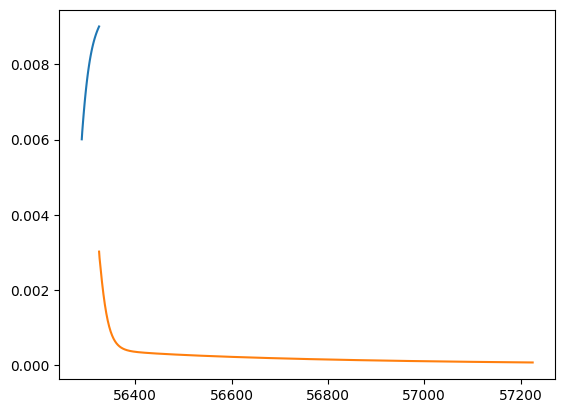

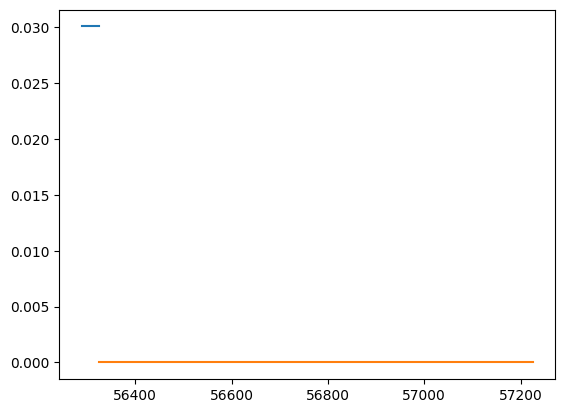

In [3]:
from pyarrow import parquet
import matplotlib.pyplot as plt

Data_pos_el_real_noise = parquet.ParquetFile(r'C:\Users\mugi_jo\New_Pybop\BASF_synthetic_negative_three_electrode_no_noise_overpotential.parquet')
# Data_pos_el_real_noise = parquet.ParquetFile(r'C:\Users\mugi_jo\New_Pybop\overpotentials.parquet')
###The Data in the .parquet is grouped by indices that are directly correlated to the pulse number. E.g. index 0 is the data of the current part of pulse 0, and indice 1 is the corresponding relaxation phase. 
###As example we want to plot the pulse n = 74
n = 50
row_pulse = Data_pos_el_real_noise.read_row_group(2*n)
row_relax = Data_pos_el_real_noise.read_row_group(2*n+1)
print(row_relax)

plt.plot(row_pulse['timepoints [s]'], row_pulse['voltages [V]'])
plt.plot(row_relax['timepoints [s]'], row_relax['voltages [V]'])
plt.show()

plt.plot(row_pulse['timepoints [s]'], row_pulse['currents [A]'])
plt.plot(row_relax['timepoints [s]'], row_relax['currents [A]'])

In [4]:
from pyarrow import parquet
pf = parquet.ParquetFile(r"C:\Users\mugi_jo\New_Pybop\overpotentials.parquet")
print("Row groups:", pf.num_row_groups)
print("Columns:", [f.name for f in pf.schema])
print(pf.schema)  # full schema


Row groups: 138
Columns: ['time [s]', 'current [A]', 'voltage [V]', 'pulse_index', 'other']
required group field_id=-1 schema {
  optional double field_id=-1 time [s];
  optional double field_id=-1 current [A];
  optional double field_id=-1 voltage [V];
  optional int32 field_id=-1 pulse_index;
  optional binary field_id=-1 other (String);
}



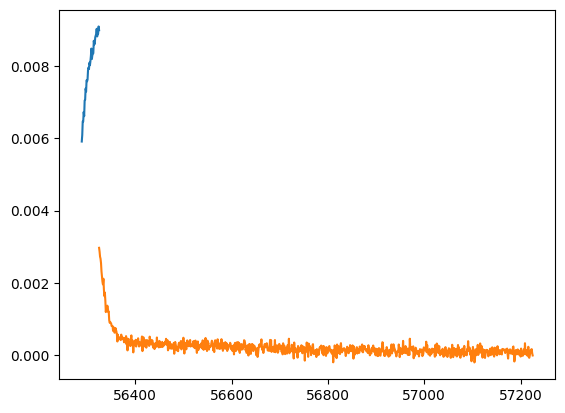

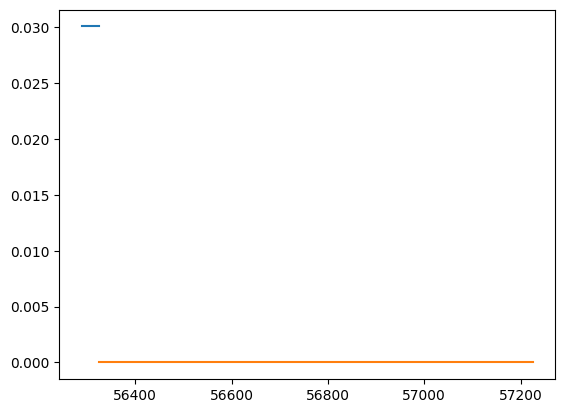

In [5]:
Data_pos_el_real_noise = parquet.ParquetFile(r'C:\Users\mugi_jo\Downloads\BASF_synthetic_negative_three_electrode_realistic_noise_overpotential.parquet')

###The Data in the .parquet is grouped by indices that are directly correlated to the pulse number. E.g. index 0 is the data of the current part of pulse 0, and indice 1 is the corresponding relaxation phase. 
###As example we want to plot the pulse n = 74
n = 50
row_pulse = Data_pos_el_real_noise.read_row_group(2*n)
row_relax = Data_pos_el_real_noise.read_row_group(2*n+1)

plt.plot(row_pulse['timepoints [s]'], row_pulse['voltages [V]'])
plt.plot(row_relax['timepoints [s]'], row_relax['voltages [V]'])
plt.show()

plt.plot(row_pulse['timepoints [s]'], row_pulse['currents [A]'])
plt.plot(row_relax['timepoints [s]'], row_relax['currents [A]'])
plt.show()

In [2]:
# LOCAL-ONLY PIPELINE, LESS-REDUNDANT PATHS + LIVE PRINT FOR STEP 3
# - Uses base directories so paths aren't repeated everywhere
# - Low-memory streaming for all steps
# - Step 3 prints progress live to the notebook *and* logs to disk (tee)
# - Uses current kernel's Python

import os
import sys
import gc
import subprocess
from pathlib import Path
from datetime import datetime

PYTHON = sys.executable
os.environ.setdefault("MPLBACKEND", "Agg")
os.environ.setdefault("PYTHONIOENCODING", "utf-8")

# ================== BASE DIRECTORIES (EDIT ROOT ONLY IF NEEDED) ==================
ROOT = Path(r"C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data")
SCRIPTS = ROOT  # your local scripts live under ROOT in your examples
D13 = ROOT / "data_thirteen" / "delith"
# ================================================================================

# ================== CONFIG (DERIVED FROM BASES) ==================
# Step 1
parquet_path = D13 / "6813_puls_data_delith_multirowgroup.parquet"
json_from_parquet = D13 / "6813_puls_data_delith_multirowgroup.json"

# Step 2
extract_ocv_curve_local_py = SCRIPTS / "extract_ocv_curve_local.py"
ocv_extraction_basename = D13 / "MyOutputFileName"  # no extension
ocv_extract_plot_title = "My Plot Title"
select_segments_arg = "[(1, None, 2)]"
split_on_current_direction = "false"
positive_current_is_lithiation = "true"

# Step 3
ocv_fit_input_json = ocv_extraction_basename.with_name(ocv_extraction_basename.name + "_extraction.json")
fit_and_plot_ocv_local_py = SCRIPTS / "fit_and_plot_ocv_local.py"
ocv_fit_title = "OCV Curve Fit"
soc_key = "SOC [C]"
ocv_key = "OCV [V]"
poly_degree = "3"
weight_exp = "1.0"
temp_K = "298.15"
ocv_bounds = "(0.01, 0.95)"
soc_bounds = "(0.0, 1.0)"
electrode_name = "Negative"
plot_points = "false"
fit_domain = "(0.001, 0.999)"
jump_penalty = "2"
export_lang = "python"
extrapolate = "false"
derivative_order = "2"
fit_kwargs = "{}"

# Step 5
data_four_json = json_from_parquet
selected_segments_json = D13 / "selected_segments.json"  # single file used for both
segments_selection = "[(2, None)]"
measurement_type = "cycling"

# Step 6
extract_overpotential_script = SCRIPTS / "extract_overpotential_local.py"
ocv_fit_for_local = ocv_fit_input_json
parameters_file = ROOT / "customcells_3262_lithiation.py"
electrode_choice = "positive"
current_sign = "-1"
figure_format = "pdf"
overwrite_fig = "true"
overpotentials_out = D13 / "overpotentials.json"

# Step 7
store_overpotential_as_parquet_local_py = SCRIPTS / "store_overpotential_as_parquet_local.py"
overpotentials_parquet_basename = overpotentials_out.with_suffix("")
parquet_compression_level = 22
parquet_overwrite = True
# =================================================================

# ---------- helpers ----------
LOG_DIR = D13 / "_logs"
LOG_DIR.mkdir(parents=True, exist_ok=True)

def _ts():
    return datetime.now().strftime("%Y%m%d_%H%M%S")

def _log_files(tag: str):
    base = LOG_DIR / f"{_ts()}_{tag}"
    return base.with_suffix(".out"), base.with_suffix(".err")

def _print_step(title: str):
    print(f"\n{'-'*88}\n{title}\n{'-'*88}")

def ensure_parent(path: Path):
    path.parent.mkdir(parents=True, exist_ok=True)

def run_to_files(cmd, *, stdin_path: Path | None = None, stdout_path: Path | None = None, tag: str = "step"):
    """Run a command streaming I/O to files (low memory)."""
    out_log, err_log = _log_files(tag)
    if stdout_path is not None:
        stdout_handle = open(stdout_path, "w", encoding="utf-8")
    else:
        stdout_handle = open(out_log, "w", encoding="utf-8")
    stderr_handle = open(err_log, "w", encoding="utf-8")
    stdin_handle = open(stdin_path, "r", encoding="utf-8") if stdin_path else None

    try:
        print("RUN:", " ".join(map(str, cmd)))
        subprocess.run(
            cmd,
            text=True,
            check=True,
            env=os.environ,
            stdin=stdin_handle,
            stdout=stdout_handle,
            stderr=stderr_handle,
            close_fds=True,
        )
    except subprocess.CalledProcessError as e:
        try:
            stderr_handle.flush()
            err_tail = Path(err_log).read_text(encoding="utf-8", errors="ignore")[-4000:]
        except Exception:
            err_tail = "<failed to read stderr log>"
        raise RuntimeError(f"Command failed: {' '.join(map(str, cmd))}\n\n[stderr tail]\n{err_tail}") from e
    finally:
        if stdin_handle: stdin_handle.close()
        stdout_handle.close()
        stderr_handle.close()
        del stdin_handle, stdout_handle, stderr_handle
        gc.collect()

    if stdout_path is None:
        print(f"  stdout → {out_log}")
    print(f"  stderr → {err_log}")

def run_with_live_tee(cmd, *, stdin_path: Path | None = None, tag: str = "step_live"):
    """
    Run a command and print stdout/stderr live to the notebook
    while also saving full logs to disk. Uses line-by-line streaming (no big buffers).
    """
    out_log, err_log = _log_files(tag)
    stdout_log = open(out_log, "w", encoding="utf-8")
    stderr_log = open(err_log, "w", encoding="utf-8")
    stdin_handle = open(stdin_path, "r", encoding="utf-8") if stdin_path else None

    print("RUN (live):", " ".join(map(str, cmd)))
    try:
        with subprocess.Popen(
            cmd,
            text=True,
            env=os.environ,
            stdin=stdin_handle,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            bufsize=1,
            universal_newlines=True,
            close_fds=True,
        ) as proc:
            # Stream stdout
            for line in proc.stdout:
                print(line, end="")        # live to notebook
                stdout_log.write(line)     # also to file
            # Stream stderr
            for line in proc.stderr:
                print(line, end="")        # live to notebook (optional: route to sys.stderr)
                stderr_log.write(line)

            ret = proc.wait()
            if ret != 0:
                raise RuntimeError(f"Command failed with return code {ret}: {' '.join(map(str, cmd))}")
    finally:
        if stdin_handle: stdin_handle.close()
        stdout_log.close()
        stderr_log.close()
        del stdin_handle, stdout_log, stderr_log
        gc.collect()

    print(f"(logs) stdout → {out_log}")
    print(f"(logs) stderr → {err_log}")

# ---------- pipeline ----------
def main_local_only():
    # STEP 1: parquet → json (stream to file)
    _print_step("STEP 1: read_measurement_from_parquet → JSON (local, streamed)")
    ensure_parent(json_from_parquet)
    cmd1 = [
        PYTHON, str(SCRIPTS / "read_measurement_from_parquet_local.py"),
        "-r", "0",
        "-n", str(parquet_path),
        "-t", "cycling",
        "--arg-indices",
    ]
    run_to_files(cmd1, stdout_path=json_from_parquet, tag="step1")
    print(f"Wrote: {json_from_parquet}")
    gc.collect()

    # STEP 2: extract_ocv_curve (streamed)
    _print_step("STEP 2: extract_ocv_curve (local, streamed)")
    cmd2 = [
        PYTHON, str(extract_ocv_curve_local_py),
        "-n", str(ocv_extraction_basename),
        "-t", str(ocv_extract_plot_title),
        "-f", "pdf",
        "-s", str(select_segments_arg),
        "-c", "0.0",
        "--split-on-current-direction", str(split_on_current_direction),
        "--positive-current-is-lithiation", str(positive_current_is_lithiation),
    ]
    run_to_files(cmd2, stdin_path=json_from_parquet, tag="step2")
    gc.collect()

    # STEP 3: fit_and_plot_ocv — LIVE OUTPUT + logs to disk
    _print_step("STEP 3: fit_and_plot_ocv (local, LIVE output + logs)")
    if not Path(ocv_fit_input_json).exists():
        p = Path(ocv_fit_input_json).parent
        listing = "\n".join("  - " + c.name for c in p.glob("*"))
        raise FileNotFoundError(f"Missing: {ocv_fit_input_json}\nDirectory listing of {p}:\n{listing}")

    cmd3 = [
        PYTHON, str(fit_and_plot_ocv_local_py),
        "-n", str(ocv_fit_input_json),
        "-t", str(ocv_fit_title),
        "-f", "pdf",
        "-s", str(soc_key),
        "-o", str(ocv_key),
        "-a", str(poly_degree),
        "-z", str(weight_exp),
        "-k", str(temp_K),
        "-u", str(ocv_bounds),
        "-g", str(soc_bounds),
        "-c", str(electrode_name),
        "-p", str(plot_points),
        "-b", str(fit_domain),
        "-j", str(jump_penalty),
        "-l", str(export_lang),
        "-x", str(extrapolate),
        "-d", str(derivative_order),
        "-m", str(fit_kwargs),
    ]
    run_with_live_tee(cmd3, tag="step3_live")
    gc.collect()

    # STEP 4: reminder
    _print_step("STEP 4: Ensure parameters file is updated")

    # STEP 5: select_measurement_segments (single output file)
    _print_step("STEP 5: select_measurement_segments (streamed)")
    cmd5 = [PYTHON, "-m", "ep_bolfi.kadi_tools.select_measurement_segments", segments_selection, "-t", measurement_type]
    run_to_files(cmd5, stdin_path=data_four_json, stdout_path=selected_segments_json, tag="step5")
    print(f"Wrote: {selected_segments_json}")
    gc.collect()

    # STEP 6: extract_overpotential_local — stream input, write output file
    _print_step("STEP 6: extract_overpotential_local (local, streamed)")
    ensure_parent(overpotentials_out)
    cmd6 = [
        PYTHON, str(extract_overpotential_script),
        "-n", str(ocv_fit_for_local),
        "-q", str(parameters_file),
        "-e", str(electrode_choice),
        "-c", str(current_sign),
        "-f", str(figure_format),
        "--overwrite", str(overwrite_fig),
    ]
    run_to_files(cmd6, stdin_path=selected_segments_json, stdout_path=overpotentials_out, tag="step6")
    print(f"Wrote: {overpotentials_out}")
    gc.collect()

    # STEP 7: store_overpotential_as_parquet_local — stream input
    _print_step("STEP 7: store_overpotential_as_parquet_local (local, streamed)")
    cmd7 = [
        PYTHON, str(store_overpotential_as_parquet_local_py),
        "-n", str(overpotentials_parquet_basename),
        "-c", str(parquet_compression_level),
    ]
    if parquet_overwrite:
        cmd7.append("--overwrite")
    run_to_files(cmd7, stdin_path=overpotentials_out, tag="step7")
    print(f"Wrote: {overpotentials_parquet_basename.with_suffix('.parquet')}")
    gc.collect()

    _print_step("ALL DONE ✅")

main_local_only()



----------------------------------------------------------------------------------------
STEP 1: read_measurement_from_parquet → JSON (local, streamed)
----------------------------------------------------------------------------------------
RUN: c:\Users\mugi_jo\New_Pybop\new_pybop\Scripts\python.exe C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data\read_measurement_from_parquet_local.py -r 0 -n C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data\data_thirteen\delith\6813_puls_data_delith_multirowgroup.parquet -t cycling --arg-indices
  stderr → C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data\data_thirteen\delith\_logs\20251010_103059_step1.err
Wrote: C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data\data_thirteen\delith\6813_puls_data_delith_multirowgroup.json

----------------------------------------------------------------------------------------
STEP 2: extract_ocv_curve (local, streamed)
-------------------------------------------------------------------------------------

In [ ]:
################LOCAL-ONLY PIPELINE FOR PREPROCESSING DATE_WITH CLEANING ON STEP_3 ##############################
# - Low-memory streaming for all steps


import os
import sys
import gc
import subprocess
from pathlib import Path
from datetime import datetime

PYTHON = sys.executable
os.environ.setdefault("MPLBACKEND", "Agg")
os.environ.setdefault("PYTHONIOENCODING", "utf-8")

# ================== BASE DIRECTORIES (EDIT ROOT ONLY IF NEEDED) ==================
ROOT = Path(r"C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data")
SCRIPTS = ROOT
Data = ROOT/"data_thirteen"/"delith"
# ================================================================================

# ================== CONFIG (DERIVED FROM BASES) ==================
# Step 1
parquet_path = Data/"6813_puls_data_delith_multirowgroup.parquet"
json_from_parquet = Data/"6813_puls_data_delith_multirowgroup.json"

# Step 2
extract_ocv_curve_local_py = SCRIPTS/"extract_ocv_curve_local.py"
ocv_extraction_basename = Data/"MyOutputFileName"  # no extension
ocv_extract_plot_title = "My Plot Title"
select_segments_arg = "[(1, None, 2)]"
split_on_current_direction = "false"
positive_current_is_lithiation = "true"

# Step 3
ocv_fit_input_json = ocv_extraction_basename.with_name(ocv_extraction_basename.name + "_extraction.json")
fit_and_plot_ocv_local_py = SCRIPTS/"fit_and_plot_ocv_local.py"
ocv_fit_title = "OCV Curve Fit"
soc_key = "SOC [C]"
ocv_key = "OCV [V]"
poly_degree = "3"
weight_exp = "1.0"
temp_K = "298.15"
ocv_bounds = "(0.01, 0.95)"
soc_bounds = "(0.0, 1.0)"
electrode_name = "Negative"
plot_points = "false"
fit_domain = "(0.001, 0.999)"
jump_penalty = "2"
export_lang = "python"
extrapolate = "false"
derivative_order = "2"
fit_kwargs = "{}"

# Step 5
data_four_json = json_from_parquet
selected_segments_json = Data/"selected_segments.json"
segments_selection = "[(2, None)]"
measurement_type = "cycling"

# Step 6
extract_overpotential_script = SCRIPTS/"extract_overpotential_local.py"
ocv_fit_for_local = ocv_fit_input_json
parameters_file = ROOT/"customcells_3262_lithiation.py"
electrode_choice = "positive"
current_sign = "-1"
figure_format = "pdf"
overwrite_fig = "true"
overpotentials_out = Data/"overpotentials.json"

# Step 7
store_overpotential_as_parquet_local_py = SCRIPTS/"store_overpotential_as_parquet_local.py"
overpotentials_parquet_basename = overpotentials_out.with_suffix("")
parquet_compression_level = 22
parquet_overwrite = True
# =================================================================

# ---------- helpers ----------
LOG_DIR = Data/"_logs"
LOG_DIR.mkdir(parents=True, exist_ok=True)

def _ts():
    return datetime.now().strftime("%Y%m%d_%H%M%S")

def _log_files(tag: str):
    base = LOG_DIR / f"{_ts()}_{tag}"
    return base.with_suffix(".out"), base.with_suffix(".err")

def _print_step(title: str):
    print(f"\n{'-'*88}\n{title}\n{'-'*88}")

def ensure_parent(path: Path):
    path.parent.mkdir(parents=True, exist_ok=True)

def run_to_files(cmd, *, stdin_path: Path | None = None, stdout_path: Path | None = None, tag: str = "step"):
    """Run a command streaming I/O to files (low memory)."""
    out_log, err_log = _log_files(tag)
    if stdout_path is not None:
        stdout_handle = open(stdout_path, "w", encoding="utf-8")
    else:
        stdout_handle = open(out_log, "w", encoding="utf-8")
    stderr_handle = open(err_log, "w", encoding="utf-8")
    stdin_handle = open(stdin_path, "r", encoding="utf-8") if stdin_path else None

    try:
        print("RUN:", " ".join(map(str, cmd)))
        subprocess.run(
            cmd,
            text=True,
            check=True,
            env=os.environ,
            stdin=stdin_handle,
            stdout=stdout_handle,
            stderr=stderr_handle,
            close_fds=True,
        )
    except subprocess.CalledProcessError as e:
        try:
            stderr_handle.flush()
            err_tail = Path(err_log).read_text(encoding="utf-8", errors="ignore")[-4000:]
        except Exception:
            err_tail = "<failed to read stderr log>"
        raise RuntimeError(f"Command failed: {' '.join(map(str, cmd))}\n\n[stderr tail]\n{err_tail}") from e
    finally:
        if stdin_handle: stdin_handle.close()
        stdout_handle.close()
        stderr_handle.close()
        del stdin_handle, stdout_handle, stderr_handle
        gc.collect()

    if stdout_path is None:
        print(f"  stdout → {out_log}")
    print(f"  stderr → {err_log}")

def run_to_single_file(cmd, *, stdin_path: Path | None = None, output_path: Path, unbuffered_python=True):
    """
    Run a command and stream BOTH stdout & stderr into one file (low memory).
    Useful when you want a single 'as-is' artifact.
    """
    ensure_parent(output_path)
    with open(output_path, "w", encoding="utf-8") as out:
        env = os.environ.copy()
        if unbuffered_python:
            env["PYTHONUNBUFFERED"] = "1"
            env.setdefault("PYTHONIOENCODING", "utf-8")
        stdin_handle = open(stdin_path, "r", encoding="utf-8") if stdin_path else None
        try:
            print("RUN:", " ".join(map(str, cmd)))
            subprocess.run(
                cmd,
                text=True,
                check=True,
                env=env,
                stdin=stdin_handle,
                stdout=out,
                stderr=out,     # <- same file: merged output
                close_fds=True,
            )
        except subprocess.CalledProcessError as e:
            # In case of error, the full output is already in output_path
            tail = ""
            try:
                tail = output_path.read_text(encoding="utf-8", errors="ignore")[-4000:]
            except Exception:
                pass
            raise RuntimeError(
                f"Command failed: {' '.join(map(str, cmd))}\n\n[output tail]\n{tail}"
            ) from e
        finally:
            if stdin_handle: stdin_handle.close()
            gc.collect()
    print(f"(step 3 output saved) → {output_path}")

# ---------- pipeline ----------
def main_local_only():
    # STEP 1
    _print_step("STEP 1: read_measurement_from_parquet → JSON (local, streamed)")
    ensure_parent(json_from_parquet)
    cmd1 = [
        PYTHON, str(SCRIPTS/"read_measurement_from_parquet_local.py"),
        "-r", "0",
        "-n", str(parquet_path),
        "-t", "cycling",
        "--arg-indices",
    ]
    run_to_files(cmd1, stdout_path=json_from_parquet, tag="step1")
    print(f"Wrote: {json_from_parquet}")
    gc.collect()

    # STEP 2
    _print_step("STEP 2: extract_ocv_curve (local, streamed)")
    cmd2 = [
        PYTHON, str(extract_ocv_curve_local_py),
        "-n", str(ocv_extraction_basename),
        "-t", str(ocv_extract_plot_title),
        "-f", "pdf",
        "-s", str(select_segments_arg),
        "-c", "0.0",
        "--split-on-current-direction", str(split_on_current_direction),
        "--positive-current-is-lithiation", str(positive_current_is_lithiation),
    ]
    run_to_files(cmd2, stdin_path=json_from_parquet, tag="step2")
    gc.collect()

    # STEP 3 — SAVE ONLY (no printing): write stdout+stderr to .py in CWD
    _print_step("STEP 3: fit_and_plot_ocv (local, SAVE output to .py in current directory)")
    if not Path(ocv_fit_input_json).exists():
        p = Path(ocv_fit_input_json).parent
        listing = "\n".join("  - " + c.name for c in p.glob("*"))
        raise FileNotFoundError(f"Missing: {ocv_fit_input_json}\nDirectory listing of {p}:\n{listing}")

    cmd3 = [
        PYTHON, str(fit_and_plot_ocv_local_py),
        "-n", str(ocv_fit_input_json),
        "-t", str(ocv_fit_title),
        "-f", "pdf",
        "-s", str(soc_key),
        "-o", str(ocv_key),
        "-a", str(poly_degree),
        "-z", str(weight_exp),
        "-k", str(temp_K),
        "-u", str(ocv_bounds),
        "-g", str(soc_bounds),
        "-c", str(electrode_name),
        "-p", str(plot_points),
        "-b", str(fit_domain),
        "-j", str(jump_penalty),
        "-l", str(export_lang),
        "-x", str(extrapolate),
        "-d", str(derivative_order),
        "-m", str(fit_kwargs),
    ]
    # Save to current working directory as .py
    # step3_output_py = Path.cwd() / "step3_fit_and_plot_ocv_output.py"
    ocv_function_path = Data/"ocv_function.py"  
    run_to_single_file(cmd3, output_path=ocv_function_path)
    gc.collect()

    # STEP 4
    _print_step("STEP 4: Ensure parameters file is updated")

    # STEP 5
    _print_step("STEP 5: select_measurement_segments (streamed)")
    cmd5 = [PYTHON, "-m", "ep_bolfi.kadi_tools.select_measurement_segments", segments_selection, "-t", measurement_type]
    run_to_files(cmd5, stdin_path=data_four_json, stdout_path=selected_segments_json, tag="step5")
    print(f"Wrote: {selected_segments_json}")
    gc.collect()

    # STEP 6
    _print_step("STEP 6: extract_overpotential_local (local, streamed)")
    ensure_parent(overpotentials_out)
    cmd6 = [
        PYTHON, str(extract_overpotential_script),
        "-n", str(ocv_fit_for_local),
        "-q", str(parameters_file),
        "-e", str(electrode_choice),
        "-c", str(current_sign),
        "-f", str(figure_format),
        "--overwrite", str(overwrite_fig),
    ]
    run_to_files(cmd6, stdin_path=selected_segments_json, stdout_path=overpotentials_out, tag="step6")
    print(f"Wrote: {overpotentials_out}")
    gc.collect()

    # STEP 7
    _print_step("STEP 7: store_overpotential_as_parquet_local (local, streamed)")
    cmd7 = [
        PYTHON, str(store_overpotential_as_parquet_local_py),
        "-n", str(overpotentials_parquet_basename),
        "-c", str(parquet_compression_level),
    ]
    if parquet_overwrite:
        cmd7.append("--overwrite")
    run_to_files(cmd7, stdin_path=overpotentials_out, tag="step7")
    print(f"Wrote: {overpotentials_parquet_basename.with_suffix('.parquet')}")
    gc.collect()

    _print_step("ALL DONE ✅")

main_local_only()



----------------------------------------------------------------------------------------
STEP 1: read_measurement_from_parquet → JSON (local, streamed)
----------------------------------------------------------------------------------------
RUN: c:\Users\mugi_jo\New_Pybop\new_pybop\Scripts\python.exe C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data\read_measurement_from_parquet_local.py -r 0 -n C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data\data_thirteen\delith\6813_puls_data_delith_multirowgroup.parquet -t cycling --arg-indices
  stderr → C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data\data_thirteen\delith\_logs\20251010_112611_step1.err
Wrote: C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data\data_thirteen\delith\6813_puls_data_delith_multirowgroup.json

----------------------------------------------------------------------------------------
STEP 2: extract_ocv_curve (local, streamed)
-------------------------------------------------------------------------------------

In [21]:
from data_custom_cell_neg_electrode.ocv_function import OCV_Curve_Fit

import numpy as np
# Pybop\data_custom_cell_neg_electrode\ocv_function.py
# scalar
# v50 = OCV_Curve_Fit(0.50)

# # vector (recommended)
# soc = np.linspace(0.0, 1.0, 1000)
# v = OCV_Curve_Fit(soc)


In [3]:
# LOCAL-ONLY PIPELINE, LESS-REDUNDANT PATHS + STEP 3 stdout->.py, stderr->.err, then SANITIZE
# - Low-memory streaming for all steps
# - Step 3 writes stdout to ocv_function.py (no warnings) and stderr to ocv_function.err
# - Then cleans ocv_function.py into ocv_function_clean.py (import-ready)

import os
import sys
import gc
import re
import contextlib
import subprocess
from pathlib import Path
from datetime import datetime

PYTHON = sys.executable
os.environ.setdefault("MPLBACKEND", "Agg")
os.environ.setdefault("PYTHONIOENCODING", "utf-8")

# ================== BASE DIRECTORIES (EDIT ROOT ONLY IF NEEDED) ==================
ROOT = Path(r"C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data")
SCRIPTS = ROOT
D13 = ROOT / "data_thirteen" / "delith"
# ================================================================================

# ================== CONFIG (DERIVED FROM BASES) ==================
# Step 1
parquet_path = D13 / "6813_puls_data_delith_multirowgroup.parquet"
json_from_parquet = D13 / "6813_puls_data_delith_multirowgroup.json"

# Step 2
extract_ocv_curve_local_py = SCRIPTS / "extract_ocv_curve_local.py"
ocv_extraction_basename = D13 / "MyOutputFileName"  # no extension
ocv_extract_plot_title = "My Plot Title"
select_segments_arg = "[(1, None, 2)]"
split_on_current_direction = "false"
positive_current_is_lithiation = "true"

# Step 3
ocv_fit_input_json = ocv_extraction_basename.with_name(ocv_extraction_basename.name + "_extraction.json")
fit_and_plot_ocv_local_py = SCRIPTS / "fit_and_plot_ocv_local.py"
ocv_fit_title = "OCV Curve Fit"
soc_key = "SOC [C]"
ocv_key = "OCV [V]"
poly_degree = "3"
weight_exp = "1.0"
temp_K = "298.15"
ocv_bounds = "(0.01, 0.95)"
soc_bounds = "(0.0, 1.0)"
electrode_name = "Negative"
plot_points = "false"
fit_domain = "(0.001, 0.999)"
jump_penalty = "2"
export_lang = "python"
extrapolate = "false"
derivative_order = "2"
fit_kwargs = "{}"

# Step 5
data_four_json = json_from_parquet
selected_segments_json = D13 / "selected_segments.json"
segments_selection = "[(2, None)]"
measurement_type = "cycling"

# Step 6
extract_overpotential_script = SCRIPTS / "extract_overpotential_local.py"
ocv_fit_for_local = ocv_fit_input_json
parameters_file = ROOT / "customcells_3262_lithiation.py"
electrode_choice = "positive"
current_sign = "-1"
figure_format = "pdf"
overwrite_fig = "true"
overpotentials_out = D13 / "overpotentials.json"

# Step 7
store_overpotential_as_parquet_local_py = SCRIPTS / "store_overpotential_as_parquet_local.py"
overpotentials_parquet_basename = overpotentials_out.with_suffix("")
parquet_compression_level = 22
parquet_overwrite = True
# =================================================================

# ---------- helpers ----------
LOG_DIR = D13 / "_logs"
LOG_DIR.mkdir(parents=True, exist_ok=True)

def _ts():
    return datetime.now().strftime("%Y%m%d_%H%M%S")

def _log_files(tag: str):
    base = LOG_DIR / f"{_ts()}_{tag}"
    return base.with_suffix(".out"), base.with_suffix(".err")

def _print_step(title: str):
    print(f"\n{'-'*88}\n{title}\n{'-'*88}")

def ensure_parent(path: Path):
    path.parent.mkdir(parents=True, exist_ok=True)

def run_to_files(cmd, *, stdin_path: Path | None = None, stdout_path: Path | None = None, tag: str = "step"):
    """Run a command streaming I/O to files (low memory)."""
    out_log, err_log = _log_files(tag)
    if stdout_path is not None:
        stdout_handle = open(stdout_path, "w", encoding="utf-8")
    else:
        stdout_handle = open(out_log, "w", encoding="utf-8")
    stderr_handle = open(err_log, "w", encoding="utf-8")
    stdin_handle = open(stdin_path, "r", encoding="utf-8") if stdin_path else None

    try:
        print("RUN:", " ".join(map(str, cmd)))
        subprocess.run(
            cmd,
            text=True,
            check=True,
            env=os.environ,
            stdin=stdin_handle,
            stdout=stdout_handle,
            stderr=stderr_handle,
            close_fds=True,
        )
    except subprocess.CalledProcessError as e:
        try:
            stderr_handle.flush()
            err_tail = Path(err_log).read_text(encoding="utf-8", errors="ignore")[-4000:]
        except Exception:
            err_tail = "<failed to read stderr log>"
        raise RuntimeError(f"Command failed: {' '.join(map(str, cmd))}\n\n[stderr tail]\n{err_tail}") from e
    finally:
        if stdin_handle: stdin_handle.close()
        stdout_handle.close()
        stderr_handle.close()
        del stdin_handle, stdout_handle, stderr_handle
        gc.collect()

    if stdout_path is None:
        print(f"  stdout → {out_log}")
    print(f"  stderr → {err_log}")

import contextlib

def run_to_single_file_stdout_only(
    cmd,
    *,
    stdin_path: Path | None = None,
    stdout_path: Path,
    stderr_path: Path | None = None,
    unbuffered_python: bool = True,
):
    """stdout → stdout_path (.py), stderr → stderr_path (.err)."""
    ensure_parent(stdout_path)
    if stderr_path is None:
        stderr_path = stdout_path.with_suffix(".err")

    env = os.environ.copy()
    if unbuffered_python:
        env["PYTHONUNBUFFERED"] = "1"
        env.setdefault("PYTHONIOENCODING", "utf-8")

    with open(stdout_path, "w", encoding="utf-8") as out, \
         open(stderr_path, "w", encoding="utf-8") as err, \
         (open(stdin_path, "r", encoding="utf-8") if stdin_path else contextlib.nullcontext()) as in_h:
        print("RUN:", " ".join(map(str, cmd)))
        try:
            subprocess.run(
                cmd,
                text=True,
                check=True,
                env=env,
                stdin=(in_h if stdin_path else None),
                stdout=out,
                stderr=err,   # <-- warnings go here
                close_fds=True,
            )
        except subprocess.CalledProcessError as e:
            tail = Path(stderr_path).read_text(encoding="utf-8", errors="ignore")[-4000:]
            raise RuntimeError(
                f"Command failed: {' '.join(map(str, cmd))}\n\n[stderr tail]\n{tail}"
            ) from e
    print(f"(step 3) stdout → {stdout_path}")
    print(f"(step 3) stderr → {stderr_path}")


def sanitize_ocv_module(raw_path: Path, *, overwrite: bool = False) -> Path:
    """
    Clean auto-generated ocv_function .py:
    - Comments header/report lines above the function
    - Normalizes unicode subscripts ₀…₉ → 0…9 (e.g., E₀ -> E0)
    - Ensures 'import numpy as np' is present at the top
    Writes <name>_clean.py (or overwrites original if overwrite=True).
    """
    out_path = raw_path if overwrite else raw_path.with_name(raw_path.stem + "_clean.py")
    src = raw_path.read_text(encoding="utf-8", errors="ignore")

    # Normalize unicode subscripts
    subs = str.maketrans("₀₁₂₃₄₅₆₇₈₉", "0123456789")
    src = src.translate(subs)

    # Split header vs function
    m = re.search(r'^\s*def\s+OCV_Curve_Fit\s*\(', src, flags=re.M)
    if not m:
        raise RuntimeError("Couldn't find 'def OCV_Curve_Fit(' in the generated file.")
    header, rest = src[:m.start()], src[m.start():]

    # Comment the human-readable header block
    commented_header = "\n".join("# " + ln for ln in header.splitlines())

    # Ensure numpy import present
    preamble = "# -*- coding: utf-8 -*-\nimport numpy as np\n"

    clean_src = f"{preamble}\n{commented_header}\n\n{rest}"
    out_path.write_text(clean_src, encoding="utf-8")
    print(f"Sanitized file written to: {out_path}")
    return out_path

# ---------- pipeline ----------
def main_local_only():
    # STEP 1
    _print_step("STEP 1: read_measurement_from_parquet → JSON (local, streamed)")
    ensure_parent(json_from_parquet)
    cmd1 = [
        PYTHON, str(SCRIPTS / "read_measurement_from_parquet_local.py"),
        "-r", "0",
        "-n", str(parquet_path),
        "-t", "cycling",
        "--arg-indices",
    ]
    run_to_files(cmd1, stdout_path=json_from_parquet, tag="step1")
    print(f"Wrote: {json_from_parquet}")
    gc.collect()

    # STEP 2
    _print_step("STEP 2: extract_ocv_curve (local, streamed)")
    cmd2 = [
        PYTHON, str(extract_ocv_curve_local_py),
        "-n", str(ocv_extraction_basename),
        "-t", str(ocv_extract_plot_title),
        "-f", "pdf",
        "-s", str(select_segments_arg),
        "-c", "0.0",
        "--split-on-current-direction", str(split_on_current_direction),
        "--positive-current-is-lithiation", str(positive_current_is_lithiation),
    ]
    run_to_files(cmd2, stdin_path=json_from_parquet, tag="step2")
    gc.collect()

    # STEP 3 — stdout → .py, stderr → .err, then sanitize .py
    _print_step("STEP 3: fit_and_plot_ocv (stdout→.py, stderr→.err, then sanitize)")
    if not Path(ocv_fit_input_json).exists():
        p = Path(ocv_fit_input_json).parent
        listing = "\n".join("  - " + c.name for c in p.glob("*"))
        raise FileNotFoundError(f"Missing: {ocv_fit_input_json}\nDirectory listing of {p}:\n{listing}")

    cmd3 = [
        PYTHON, str(fit_and_plot_ocv_local_py),
        "-n", str(ocv_fit_input_json),
        "-t", str(ocv_fit_title),
        "-f", "pdf",
        "-s", str(soc_key),
        "-o", str(ocv_key),
        "-a", str(poly_degree),
        "-z", str(weight_exp),
        "-k", str(temp_K),
        "-u", str(ocv_bounds),
        "-g", str(soc_bounds),
        "-c", str(electrode_name),
        "-p", str(plot_points),
        "-b", str(fit_domain),
        "-j", str(jump_penalty),
        "-l", str(export_lang),
        "-x", str(extrapolate),
        "-d", str(derivative_order),
        "-m", str(fit_kwargs),
    ]

    # Save into D13 as raw .py + .err (warnings kept out of .py)
    ocv_function_path = D13 / "ocv_function.py"
    ocv_function_err  = ocv_function_path.with_suffix(".err")
    run_to_single_file_stdout_only(cmd3, stdout_path=ocv_function_path, stderr_path=ocv_function_err)


    # Sanitize the .py to produce an importable module (…_clean.py)
    ocv_function_clean = sanitize_ocv_module(ocv_function_path, overwrite=False)
    gc.collect()

    # STEP 4
    _print_step("STEP 4: Ensure parameters file is updated")

    # STEP 5
    _print_step("STEP 5: select_measurement_segments (streamed)")
    cmd5 = [PYTHON, "-m", "ep_bolfi.kadi_tools.select_measurement_segments", segments_selection, "-t", measurement_type]
    run_to_files(cmd5, stdin_path=data_four_json, stdout_path=selected_segments_json, tag="step5")
    print(f"Wrote: {selected_segments_json}")
    gc.collect()

    # STEP 6
    _print_step("STEP 6: extract_overpotential_local (local, streamed)")
    ensure_parent(overpotentials_out)
    cmd6 = [
        PYTHON, str(extract_overpotential_script),
        "-n", str(ocv_fit_for_local),
        "-q", str(parameters_file),
        "-e", str(electrode_choice),
        "-c", str(current_sign),
        "-f", str(figure_format),
        "--overwrite", str(overwrite_fig),
    ]
    run_to_files(cmd6, stdin_path=selected_segments_json, stdout_path=overpotentials_out, tag="step6")
    print(f"Wrote: {overpotentials_out}")
    gc.collect()

    # STEP 7
    _print_step("STEP 7: store_overpotential_as_parquet_local (local, streamed)")
    cmd7 = [
        PYTHON, str(store_overpotential_as_parquet_local_py),
        "-n", str(overpotentials_parquet_basename),
        "-c", str(parquet_compression_level),
    ]
    if parquet_overwrite:
        cmd7.append("--overwrite")
    run_to_files(cmd7, stdin_path=overpotentials_out, tag="step7")
    print(f"Wrote: {overpotentials_parquet_basename.with_suffix('.parquet')}")
    gc.collect()

    _print_step("ALL DONE ✅")

main_local_only()




----------------------------------------------------------------------------------------
STEP 1: read_measurement_from_parquet → JSON (local, streamed)
----------------------------------------------------------------------------------------
RUN: c:\Users\mugi_jo\New_Pybop\new_pybop\Scripts\python.exe C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data\read_measurement_from_parquet_local.py -r 0 -n C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data\data_thirteen\delith\6813_puls_data_delith_multirowgroup.parquet -t cycling --arg-indices
  stderr → C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data\data_thirteen\delith\_logs\20251010_142326_step1.err
Wrote: C:\Users\mugi_jo\Documents\DLR_PROJECTS\ruphay_data\data_thirteen\delith\6813_puls_data_delith_multirowgroup.json

----------------------------------------------------------------------------------------
STEP 2: extract_ocv_curve (local, streamed)
-------------------------------------------------------------------------------------

In [19]:
from data_custom_cell_neg_electrode.ocv_function import OCV_Curve_Fit
print(OCV_Curve_Fit)

<function OCV_Curve_Fit at 0x000002210296F100>


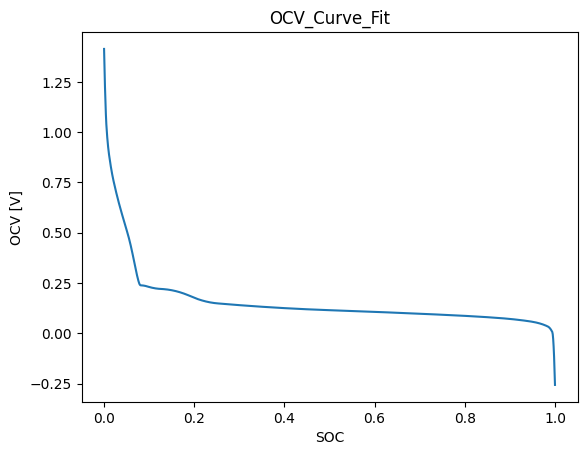

In [18]:
from data_custom_cell_neg_electrode.ocv_function import OCV_Curve_Fit
import numpy as np
import matplotlib.pyplot as plt
# single value
# v50 = float(OCV_Curve_Fit(0.50))
# print("V(0.50) =", v50)

# vectorized (recommended)
soc = np.linspace(0.0, 1.0, 1000)
soc=np.array([soc])[0]
vocv = OCV_Curve_Fit(soc)         # returns a NumPy array
vocv=np.array([vocv])[0]
# print(vocv)                 # (1000,)



plt.figure()
plt.plot(soc, vocv)
plt.xlabel("SOC")
plt.ylabel("OCV [V]")
plt.title("OCV_Curve_Fit")
plt.show()
